# YOLO v8을 사용한 의료 이미지 분석

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 400.6/460.4 GB disk)


In [2]:
import os
import random
import shutil
from tqdm.notebook import tqdm
import cv2
import glob

# Data 분할
- train, valid, test 데이터 분할
- yolo의 경우 폴더 하나에 train, valid, test 데이터 폴더만 존재해야 된다.
    - 새로운 폴더를 만들고 각각의 데이터를 분할하여 저장한다.

In [3]:
# 데이터 경로 생성

data_root = '/Users/kimhongseok/cv_79_projects/part2/18/data'
file_root = f'{data_root}'
pjt_name = 'lung_cancer'

train_file_root = f'{data_root}/{pjt_name}'
train_root = f'{data_root}/{pjt_name}/train'
valid_root = f'{data_root}/{pjt_name}/valid'
test_root = f'{data_root}/{pjt_name}/test'

cls_list = ['Bengin cases', 'Normal cases', 'Malignant cases']

for folder in [train_root, valid_root, test_root]:
    # train, valid, test 경로 생성
    if not os.path.exists(folder):
        os.makedirs(folder)

    # 각 폴더에 class 폴더 생성
    for cls in cls_list:
        cls_folder = f'{folder}/{cls}'
        if not os.path.exists(cls_folder):
            os.makedirs(cls_folder)

In [20]:
# 데이터 분할
'''
random.seed(2024)
for cls in ['Bengin cases', 'Normal cases', 'Malignant cases']:
    file_list = os.listdir(f'{file_root}/{cls}')
    random.shuffle(file_list)
    test_ratio = 0.1
    num_file = len(file_list)

    test_list = file_list[:int(num_file*test_ratio)]
    valid_list = file_list[int(num_file*test_ratio):int(num_file*test_ratio)*2]
    train_list = file_list[int(num_file*test_ratio)*2:]

    for i in test_list:
        shutil.copyfile(f'{file_root}/{cls}/{i}', f'{test_root}/{cls}/{i}')

    for i in valid_list:
        shutil.copyfile(f'{file_root}/{cls}/{i}', f'{valid_root}/{cls}/{i}')

    for i in train_list:
        shutil.copyfile(f'{file_root}/{cls}/{i}', f'{train_root}/{cls}/{i}')
'''

# data 확인

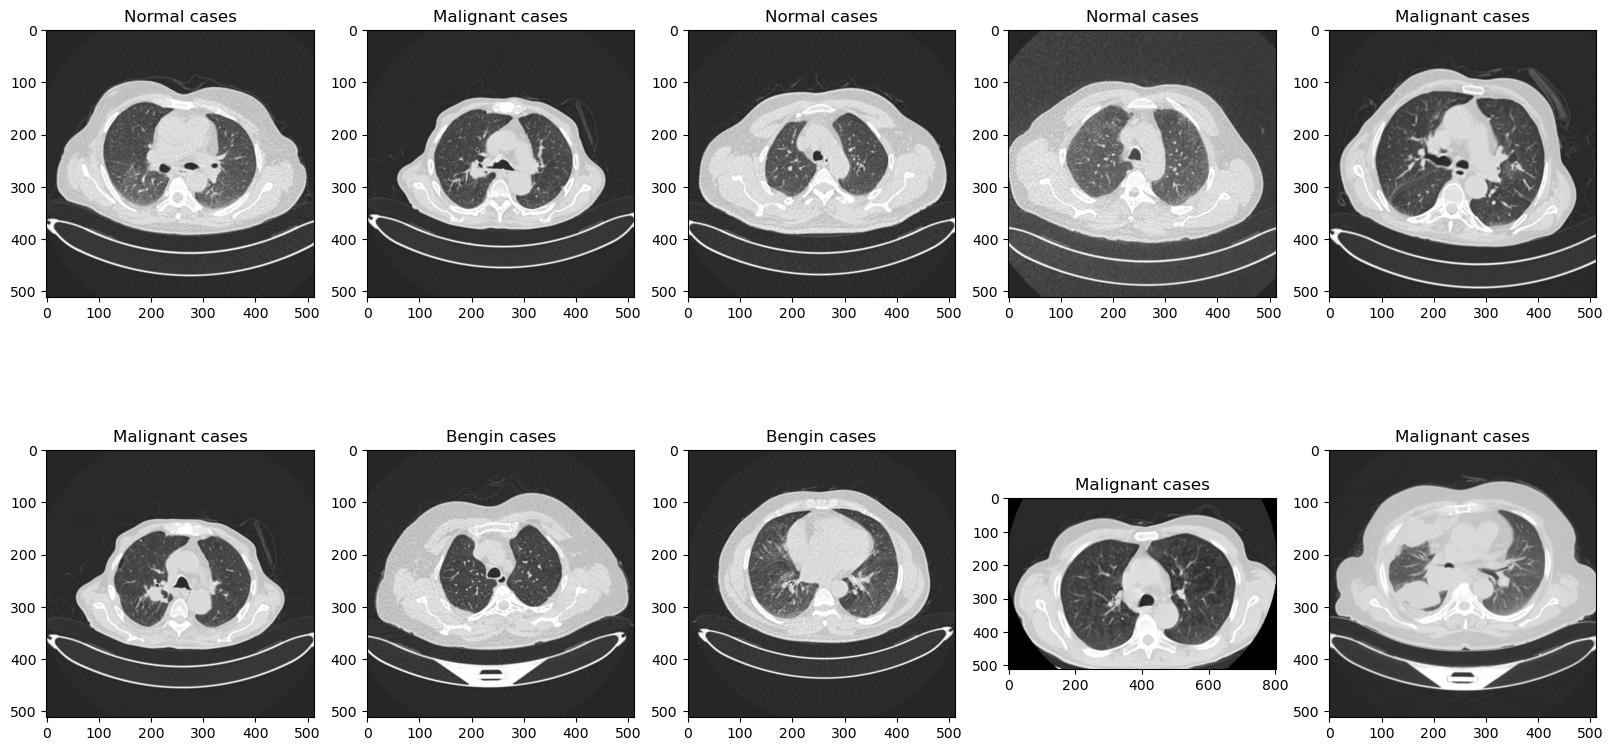

In [6]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

test_file_list = glob.glob(f'{test_root}/*/*')
random.shuffle(test_file_list)

plt.figure(figsize=(20, 10))
for i in range(10):
    test_image_path = test_file_list[i]
    ori_img = Image.open(test_image_path).convert('RGB')
    plt.subplot(2, 5, i+1)
    plt.title(test_file_list[i].split('/')[-2])
    plt.imshow(ori_img)

# config file 생성
- YOLO는 yaml파일이 필요

In [7]:
pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18'

In [12]:
import yaml
data = dict()

data['train'] = train_root
data['valid'] = valid_root
data['test'] = test_root

data['nc'] = len(cls_list)
data['names'] = cls_list

with open(f'{pjt_root}/lung_cancer.yaml', 'w') as f:
    yaml.dump(data, f)

# Training

In [14]:
from ultralytics import YOLO
pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18'
%cd /Users/kimhongseok/cv_79_projects/part2/18 # 위치 이동 -> 원하는 위치에 학습 결과를 저장하기 위해

/Users/kimhongseok/cv_79_projects/part2/18


In [15]:
# 모델 호출 및 학습
model = YOLO('yolov8s-cls.pt') # yolov8s-cls.pt -> YOLO v8의 small version, classification 수행, pretrained
results = model.train(data=train_file_root, epochs=1, batch=8, imgsz=512, patience=30, name='test')

100%|██████████| 12.3M/12.3M [00:01<00:00, 7.56MB/s]
/opt/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <9C467D80-5BAC-3156-B480-F0FF7E45DEF2> /opt/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


New https://pypi.org/project/ultralytics/8.2.87 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer, epochs=1, time=None, patience=30, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=test, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

/opt/anaconda3/lib/python3.11/site-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/train... 879 images, 0 corrupt: 100%|██████████| 879/879 [00:00<00:00, 3950.17it/s]

train: New cache created: /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/train.cache



val: Scanning /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test... 109 images, 0 corrupt: 100%|██████████| 109/109 [00:00<00:00, 4733.39it/s]

val: New cache created: /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/classify/test
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:14<00:00,  2.02s/it]


                   all      0.872          1

1 epochs completed in 0.034 hours.
Optimizer stripped from runs/classify/test/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/test/weights/best.pt, 10.3MB

Validating runs/classify/test/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/train... found 879 images in 3 classes ✅ 
val: None...
test: /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test... found 109 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:14<00:00,  2.00s/it]


                   all      0.872          1
Speed: 0.0ms preprocess, 123.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/test
Results saved to runs/classify/test


# Test

In [16]:
pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18'
result_fold = '/Users/kimhongseok/cv_79_projects/part2/18/runs/classify/test'

In [17]:
from ultralytics import YOLO

model = YOLO('/Users/kimhongseok/cv_79_projects/part2/18/runs/classify/test/weights/best.pt')
metrics = model.val(split='test')

Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/train... found 879 images in 3 classes ✅ 
val: None...
test: /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test... found 109 images in 3 classes ✅ 


test: Scanning /Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test... 109 images, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]


                   all      0.872          1
Speed: 0.0ms preprocess, 120.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [18]:
print(metrics)

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x36f6cad90>
curves: []
curves_results: []
fitness: 0.9357798099517822
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8715596199035645, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9357798099517822}
save_dir: PosixPath('runs/classify/val')
speed: {'preprocess': 0.0006868204939256021, 'inference': 120.65297310505437, 'loss': 5.2495833930619266e-05, 'postprocess': 8.09310773097047e-05}
task: 'classify'
top1: 0.8715596199035645
top5: 1.0


In [19]:
print(metrics.top1)
print(metrics.top5)

0.8715596199035645
1.0


# Inference

In [25]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import random
import torch
import torchvision.transforms as T
from PIL import Image

In [21]:
pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18'
data_root = '/Users/kimhongseok/cv_79_projects/part2/18/data'
pjt_name = 'lung_cancer'
test_root = f'{data_root}/{pjt_name}/test'

test_file_list = glob.glob(f'{test_root}/*/*.jpg')
random.shuffle(test_file_list)

In [22]:
test_file_list

['/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Malignant cases/Malignant case (426).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Malignant cases/Malignant case (520).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Malignant cases/Malignant case (376).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Bengin cases/Bengin case (1).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Malignant cases/Malignant case (32).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Malignant cases/Malignant case (373).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Malignant cases/Malignant case (355).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Normal cases/Normal case (147).jpg',
 '/Users/kimhongseok/cv_79_projects/part2/18/data/lung_cancer/test/Normal cases/Normal case (2).jpg',
 '/Users/kimhongseok/cv_79_projec

In [23]:
model = YOLO('/Users/kimhongseok/cv_79_projects/part2/18/runs/classify/test/weights/best.pt')

In [27]:
# 이미지 전처리
IMG_SIZE = (512, 512)
test_data_transform = T.Compose([
    T.Resize(IMG_SIZE),
    T.ToTensor()
])

In [30]:
tmp_img = Image.open(test_file_list[0]).convert('RGB')
img_src = test_data_transform(tmp_img)
x_tensor = img_src.unsqueeze(0)
result = model(x_tensor)[0]

print(result)


0: 512x512 Malignant cases 0.55, Normal cases 0.30, Bengin cases 0.15, 46.6ms
Speed: 0.0ms preprocess, 46.6ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Bengin cases', 1: 'Malignant cases', 2: 'Normal cases'}
obb: None
orig_img: array([[[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       ...,

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 

In [33]:
print(result.probs.data) # 각 클래스 확률
print(torch.argmax(result.probs.data).item()) # 가장 확률이 큰 인덱스 추출

tensor([0.1484, 0.5491, 0.3025])
1
